<a href="https://colab.research.google.com/github/navgaur/Statistical-Mech-LOCF/blob/main/Particles_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Mechanics Lab**

## **Collection of Particles**

**Lennard-Jones Potential**: It describes the pairwise interaction between the particles:

$$V_{LJ} (r) = 4 \epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $$

where $r$ is the distance between particles, $\epsilon$ is the depth of potential well and $\sigma$ is the finite distance at which inter-particle potential is zero.


## **Plots of Lennard Jones Potential**

###**1-D potential**

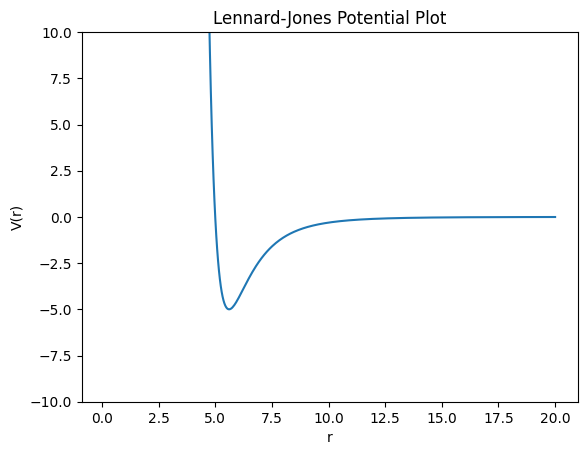

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_potential(r, epsilon, sigma):
    """
    Lennard-Jones potential function.
    """
    return 4*epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Generate 2D grid for distance values
x = np.linspace(0.1, 20, 500)  # Adjust the range and number of points as needed

# Set Lennard-Jones parameters
epsilon = 5.0
sigma = 5.0

# Calculate potential values for each point in the grid
potential = lennard_jones_potential(x, epsilon, sigma)

# Create a contour plot
plt.plot(x,potential)
plt.xlabel('r')
plt.ylabel('V(r)')
#plt.xlim(0,3)
plt.ylim(-10,10)
plt.title('Lennard-Jones Potential Plot')
plt.show()


###**2-D potential**

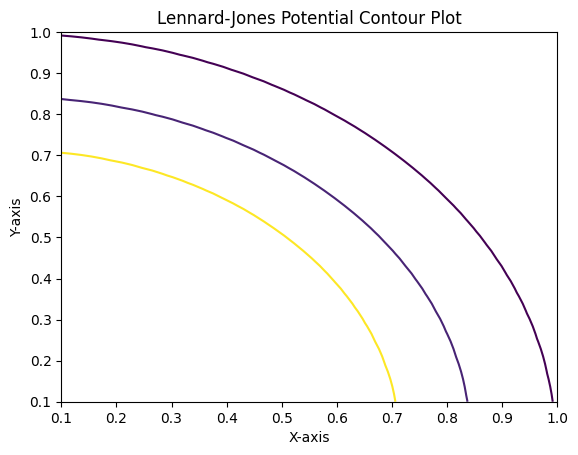

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_potential(r, epsilon, sigma):
    """
    Lennard-Jones potential function.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Generate 2D grid for distance values
x = np.linspace(0.1, 1, 50)  # Adjust the range and number of points as needed
y = np.linspace(0.1, 1, 50)
X, Y = np.meshgrid(x, y)

# Set Lennard-Jones parameters
epsilon = 1.0
sigma = 1.0

# Calculate potential values for each point in the grid
Z = lennard_jones_potential(np.sqrt(X**2 + Y**2), epsilon, sigma)

# Create a contour plot
#plt.contourf(X, Y, Z, levels=5, cmap='viridis')
#plt.colorbar(label='Lennard-Jones Potential')
plt.contour(X,Y,Z,levels=[0.1,20,200])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Lennard-Jones Potential Contour Plot')
plt.show()


## **Dynamics of particles**

[[0.5 0.5 0.5]
 [1.  1.  1. ]] <class 'numpy.ndarray'>


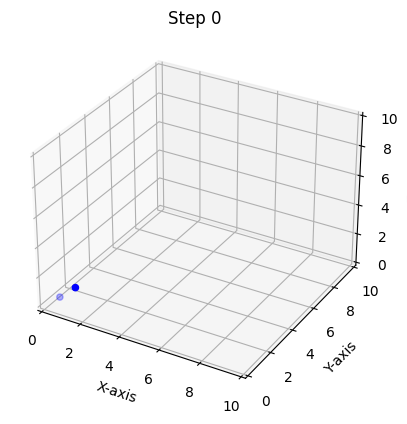

[0.5005 1.001 ] [0.5005 1.001 ] [0.5005 1.001 ]


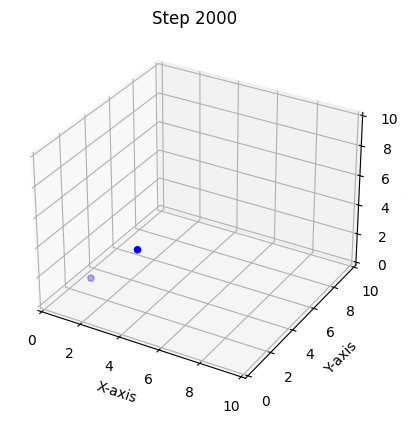

[1.5005 3.001 ] [1.5005 3.001 ] [1.5005 3.001 ]


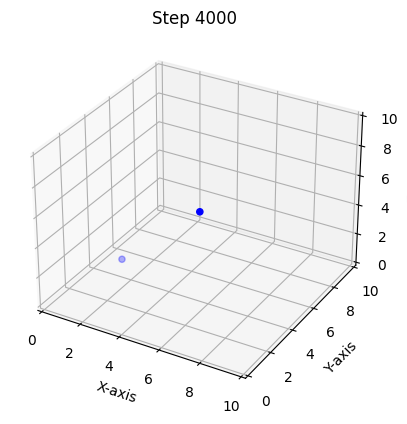

[2.5005 5.001 ] [2.5005 5.001 ] [2.5005 5.001 ]


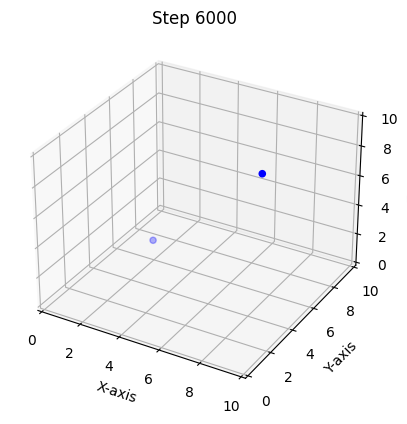

[3.5005 7.001 ] [3.5005 7.001 ] [3.5005 7.001 ]


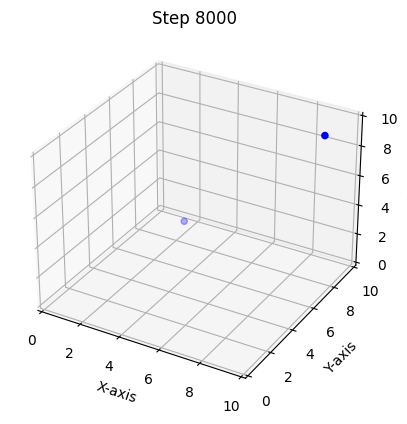

[4.5005 9.001 ] [4.5005 9.001 ] [4.5005 9.001 ]


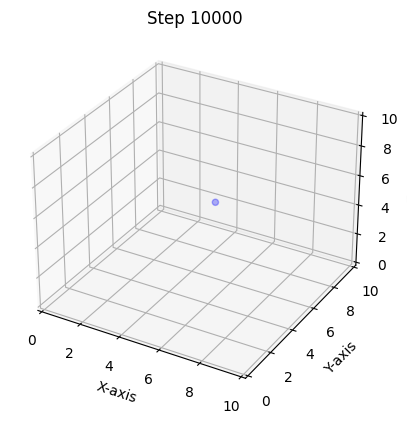

[ 5.5005 11.001 ] [ 5.5005 11.001 ] [ 5.5005 11.001 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

def lennard_jones_potential(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def calculate_forces(positions, epsilon, sigma):
    num_particles = len(positions)
    forces = np.zeros_like(positions)

    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            r_ij = positions[j] - positions[i]
            distance = np.linalg.norm(r_ij)
            force_magnitude = 24 * epsilon * (
                2 * (sigma**12 / distance**14) - (sigma**6 / distance**8)
            )
            force = force_magnitude * r_ij / distance
            forces[i] += force
            forces[j] -= force

    return forces

def run_simulation(num_particles, epsilon, sigma, num_steps, dt):
#    positions = np.random.rand(num_particles, 3)  # Initialize random positions
#    velocities = np.random.rand(num_particles, 3)  # Initialize random velocities
    masses = np.ones(num_particles)  # Assume equal masses for simplicity
    positions = np.array([[0.5, 0.5, 0.5],[1, 1, 1]])
    velocities = np.array([[0.5, 0.5, 0.5],[1, 1, 1]])
    print(positions,type(positions))
    for step in range(num_steps):
        forces = calculate_forces(positions, epsilon, sigma)

        # Update positions and velocities using Verlet integration
        positions += velocities * dt + 0.5 * forces / masses[:,None] * dt**2
        new_forces = calculate_forces(positions, epsilon, sigma)
        velocities += 0.5 * (forces + new_forces) / masses[:,None] * dt

        # Optional: Record and visualize data
        if step % 2000 == 0:
            # Visualization code (e.g., plotting particle positions)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.axes.set_xlim3d(0,10)
            ax.axes.set_ylim3d(0,10)
            ax.axes.set_zlim3d(0,10)
            ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', marker='o')
            ax.set_xlabel('X-axis')
            ax.set_ylabel('Y-axis')
            ax.set_zlabel('Z-axis')
            ax.set_title(f'Step {step}')
            plt.show()
            print(positions[:, 0], positions[:, 1], positions[:, 2])


    return positions, velocities

# Example usage
num_particles = 2
epsilon = 1
sigma = 0.01
num_steps = 11000
dt = 0.001

final_positions, final_velocities = run_simulation(num_particles, epsilon, sigma, num_steps, dt)

# Optional: Visualize the final state
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#ax.scatter(final_positions[:, 0], final_positions[:, 1], final_positions[:, 2])
#plt.show()


In [ ]:
x=np.random

In [ ]:
import numpy as np

x1=np.random.rand(1,3)
print(x1,type(x1))
x2 = np.array([[1,2,3]])
print(x2,type(x2))
print(x2-x1)

[[0.29974223 0.7431168  0.08449429]] <class 'numpy.ndarray'>
[[1 2 3]] <class 'numpy.ndarray'>
[[0.70025777 1.2568832  2.91550571]]


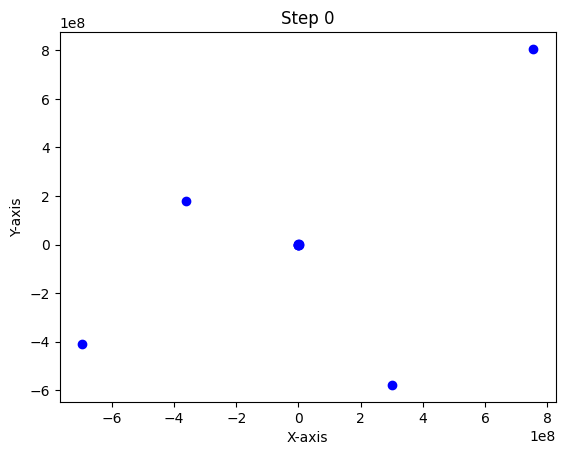

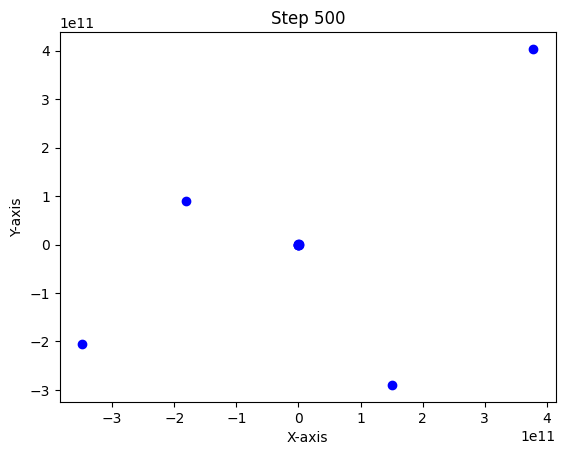

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_potential(r, epsilon, sigma):
    """
    Lennard-Jones potential function.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def calculate_forces(positions, epsilon, sigma):
    """
    Calculate forces between particles using Lennard-Jones potential.
    """
    num_particles = len(positions)
    forces = np.zeros_like(positions)

    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            r_ij = positions[j] - positions[i]
            distance = np.linalg.norm(r_ij)
            force_magnitude = 24 * epsilon * (
                2 * (sigma**12 / distance**14) - (sigma**6 / distance**8)
            )
            force = force_magnitude * r_ij / distance
            forces[i] += force
            forces[j] -= force

    return forces

def run_simulation(num_particles, epsilon, sigma, num_steps, dt):
    """
    Run molecular dynamics simulation.
    """
    positions = np.random.rand(num_particles, 2)  # Initialize random 2D positions
    velocities = np.random.rand(num_particles, 2)  # Initialize random 2D velocities
    masses = np.ones(num_particles)  # Assume equal masses for simplicity

    for step in range(num_steps):
        forces = calculate_forces(positions, epsilon, sigma)

        # Update positions and velocities using Verlet integration
        positions += velocities * dt + 0.5 * forces / masses[:, None] * dt**2
        new_forces = calculate_forces(positions, epsilon, sigma)
        velocities += 0.5 * (forces + new_forces) / masses[:, None] * dt

        # Record and visualize data
        if step % 500 == 0:
            # Visualization code: 2D scatter plot of particle positions
            plt.scatter(positions[:, 0], positions[:, 1], c='b', marker='o')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.title(f'Step {step}')
#            plt.xlim(-2,2)
#            plt.ylim(-2,2)
            plt.show()

    return positions, velocities

# Example usage
num_particles = 10
epsilon = 1
sigma = 1.0
num_steps = 1000
dt = 0.001

final_positions, final_velocities = run_simulation(num_particles, epsilon, sigma, num_steps, dt)
